# Generate 2 Input Files for TurbSim


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sys import stdout
import os, glob
from scipy.signal import detrend
from scipy import arctan2
from scipy import signal
#freqs, times, spectrogram = signal.spectrogram(sig)
import functions as f
import math

import pdb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import array

from matplotlib.ticker import FormatStrFormatter
import sys
#sys.path.ap

sys.path.append("C:/Users/krydalch/Documents/Repos/")
from datatools import wfip2
from datatools.remote_sensing import scintec_profiler

# 1. Create Velocity Profile from SODAR

### Import SODAR

In [3]:
sodar_path = "/Volumes/pdoubraw/repos/jet/data/"
sodar_path = "C:\\Users\\krydalch\\Desktop\\MetMastData\\SODAR\\"

df = wfip2.read_dir(dpath=sodar_path, reader=scintec_profiler, ext='mnd')
df = df.set_index("datetime")
# Remove Faulty Data
df = df.replace("99.99",np.nan)
df = df.replace("999.9",np.nan)

df['wind speed'] = df['wind speed'].astype(float)


In [4]:
time_vs_height = df[["wind speed","height"]].reset_index().set_index(["datetime","height"]).unstack().astype("float")
time_vs_height.index = time_vs_height.index.tz_localize("UTC")

In [5]:
df_sdr = time_vs_height.copy()

 
resamp_size = '10min'#'1H'
resamp = df_sdr.resample(resamp_size).mean()


time_of_interest = "2017-02-17 18:20:00"

df_print = resamp.loc[time_of_interest]

df_print['wind speed']


height
30.0      9.80
40.0     10.59
50.0     11.67
60.0     11.64
70.0     11.23
80.0     11.48
90.0     11.71
100.0    11.47
110.0    11.59
120.0    11.30
130.0    11.23
140.0    11.00
150.0    11.03
160.0    11.10
170.0    11.28
180.0    11.58
190.0    11.77
200.0    11.68
210.0    11.17
220.0    10.90
230.0    11.26
240.0    11.23
250.0    11.86
260.0    11.31
270.0    10.91
280.0    10.18
290.0    10.84
300.0    11.29
310.0      NaN
320.0      NaN
Name: 2017-02-17 18:20:00+00:00, dtype: float64

In [6]:
#height
df_now_new
df_now.index[3][0]

NameError: name 'df_now_new' is not defined

In [7]:
df_now

NameError: name 'df_now' is not defined

In [8]:
df_copy = time_vs_height.copy()

df_copy = df_copy.resample('30min').mean()
new_indx = df_copy.index  -df_copy.index[0] 
df_copy = df_copy.set_index(new_indx)
df_copy



wind speed                                                         \
height        30.0       40.0       50.0       60.0       70.0       80.0    
datetime                                                                     
00:00:00   5.790000   6.780000   7.590000   7.940000   8.330000   8.563333   
00:30:00   6.903333   7.730000   8.496667   9.136667   9.403333   9.656667   
01:00:00   7.233333   8.633333   9.433333  10.440000  11.333333  12.063333   
01:30:00   8.446667   9.303333  10.406667  11.410000  12.503333  13.343333   
02:00:00   7.966667   9.233333  10.646667  12.136667  13.330000  13.486667   
02:30:00   7.626667   8.833333  10.136667  11.483333  12.646667  11.940000   
03:00:00   6.376667   7.596667   9.153333  10.476667  11.963333  11.540000   
03:30:00   7.046667   8.073333   9.776667  11.200000  12.130000  12.173333   
04:00:00   6.653333   8.200000   9.283333  10.413333  11.563333  12.043333   
04:30:00   5.786667   6.893333   8.213333   9.163333  10.190000  11.250000   
05:00:00   6.883333   8.010000   9.040000  10.086667  10.996667  12.000000   
05:30:00   7.753333   9.023333  10.243333  11.050000  11.930000  12.746667   
06:00:00   8.160000   9.443333  10.603333  11.473333  12.443333  13.256667   
06:30:00   8.556667   9.696667  10.983333  12.113333  12.680000  13.586667   
07:00:00   8.213333   9.366667  10.443333  11.343333  12.246667  13.273333   
07:30:00   6.140000   6.696667   8.390000   8.803333   9.266667   9.970000   
08:00:00   5.346667   6.513333   8.033333   8.980000   9.896667  10.743333   
08:30:00   5.320000   6.793333   7.893333   8.766667   9.730000  10.646667   
09:00:00   5.816667   6.966667   8.156667   9.150000  10.073333  10.883333   
09:30:00   5.125000   6.306667   7.753333   8.580000   9.320000  10.143333   
10:00:00   6.446667   7.566667   8.746667   9.233333   9.943333  10.333333   
10:30:00   6.053333   7.203333   8.750000   9.826667  10.756667  10.910000   
11:00:00   7.390000   8.546667  10.203333  11.776667  12.500000  11.906667   
11:30:00   7.186667   8.013333   9.506667  10.620000  12.096667  11.983333   
12:00:00   6.936667   7.966667   9.043333   9.990000  10.823333  11.743333   
12:30:00   6.573333   7.733333   9.106667  10.190000  11.130000  12.113333   
13:00:00   7.680000   8.783333   9.826667  10.953333  12.230000  13.600000   
13:30:00   6.983333   8.526667   9.610000  10.763333  11.910000  13.026667   
14:00:00   6.450000   7.966667   9.190000  10.003333  11.033333  11.943333   
14:30:00   5.790000   7.370000   8.096667   8.563333   9.186667  10.056667   
15:00:00   6.413333   6.453333   7.270000   7.726667   8.273333   8.816667   
15:30:00   6.880000   7.046667   7.836667   8.016667   8.106667   8.053333   
16:00:00   6.113333   6.223333   6.590000   6.450000   6.446667   6.436667   
16:30:00   5.553333   4.963333   6.090000   5.996667   5.816667   5.763333   
17:00:00   6.020000   5.836667   6.440000   7.206667   7.096667   6.910000   
17:30:00   6.336667   7.320000   7.860000   7.976667   7.850000   7.820000   
18:00:00   8.640000   9.190000  10.410000  10.136667   9.910000   9.903333   
18:30:00  10.470000  10.830000  11.616667  11.880000  11.690000  11.770000   
19:00:00  10.646667  10.826667  11.463333  11.843333  11.826667  11.916667   
19:30:00   9.696667  10.393333  11.293333  11.280000  11.016667  11.073333   
20:00:00  10.490000  10.183333  11.033333  10.970000  10.993333  11.180000   
20:30:00  11.586667  11.160000  12.523333  12.743333  12.736667  12.730000   
21:00:00  10.836667  10.446667  11.263333  11.300000  11.053333  11.066667   
21:30:00  11.116667  10.650000  11.110000  11.436667  11.026667  11.046667   
22:00:00   9.056667   8.613333   9.290000   9.290000   9.226667   9.006667   
22:30:00   6.993333   7.520000   8.243333   8.223333   8.310000   8.043333   
23:00:00   7.146667   7.263333   7.700000   7.670000   7.866667   7.390000   
23:30:00   3.946667   4.276667   5.803333   5.740000   5.616667   5.050000   

                              

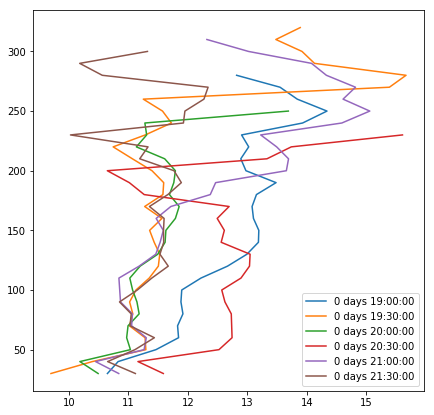

In [9]:

hour_i = 38
hour_f = 44

indxs =  df_copy.index[hour_i:hour_f]

fig = plt.figure(figsize=(7,7))
ax  = plt.plot()
# ax.loglog(f,P,'-k')
# ax.set_xlabel("Frequency [Hz]")
# ax.set_ylabel("PSD []")

for t in indxs:
    df_now = df_copy.loc[t,'wind speed']
    plt.plot(df_now.values, df_now.index,label = str(t))
    
plt.legend()

In [10]:
df_sdr

wind speed                                     \
height                         30.0   40.0   50.0   60.0   70.0   80.0    
datetime                                                                  
2017-02-17 00:00:00+00:00       5.26   6.46   7.25   7.55   7.98   8.46   
2017-02-17 00:10:00+00:00       5.89   6.72   7.45   7.87   8.27   8.28   
2017-02-17 00:20:00+00:00       6.22   7.16   8.07   8.40   8.74   8.95   
2017-02-17 00:30:00+00:00       6.58   7.46   8.05   8.79   9.16   9.37   
2017-02-17 00:40:00+00:00       6.53   7.54   8.43   8.99   9.11   9.38   
2017-02-17 00:50:00+00:00       7.60   8.19   9.01   9.63   9.94  10.22   
2017-02-17 01:00:00+00:00       6.69   8.18   9.02   9.86  11.03  11.49   
2017-02-17 01:10:00+00:00       7.14   8.92   9.71  11.05  11.85  12.47   
2017-02-17 01:20:00+00:00       7.87   8.80   9.57  10.41  11.12  12.23   
2017-02-17 01:30:00+00:00       8.11   8.81   9.93  10.94  11.86  12.88   
2017-02-17 01:40:00+00:00       8.37   9.76  10.97  11.91  13.26  13.91   
2017-02-17 01:50:00+00:00       8.86   9.34  10.32  11.38  12.39  13.24   
2017-02-17 02:00:00+00:00       7.47   8.33   9.71  10.71  11.70  13.14   
2017-02-17 02:10:00+00:00       8.02   9.47  10.95  12.30  13.93  13.83   
2017-02-17 02:20:00+00:00       8.41   9.90  11.28  13.40  14.36  13.49   
2017-02-17 02:30:00+00:00       8.23   9.13  10.54  12.19  13.06  11.76   
2017-02-17 02:40:00+00:00       7.72   8.76  10.15  11.35  12.81  12.05   
2017-02-17 02:50:00+00:00       6.93   8.61   9.72  10.91  12.07  12.01   
2017-02-17 03:00:00+00:00       6.93   7.78   9.27  10.78  12.08  11.20   
2017-02-17 03:10:00+00:00       5.97   7.43   8.91  10.39  12.02  11.45   
2017-02-17 03:20:00+00:00       6.23   7.58   9.28  10.26  11.79  11.97   
2017-02-17 03:30:00+00:00       7.07   7.63   9.45  10.98  12.25  12.67   
2017-02-17 03:40:00+00:00       7.22   8.71  10.23  11.73  12.46  12.05   
2017-02-17 03:50:00+00:00       6.85   7.88   9.65  10.89  11.68  11.80   
2017-02-17 04:00:00+00:00       6.47   8.38   9.54  10.49  11.66  12.56   
2017-02-17 04:10:00+00:00       7.29   8.86   9.86  11.09  12.23  12.00   
2017-02-17 04:20:00+00:00       6.20   7.36   8.45   9.66  10.80  11.57   
2017-02-17 04:30:00+00:00       5.51   6.93   7.91   9.02   9.88  10.67   
2017-02-17 04:40:00+00:00       5.26   6.24   7.90   8.73   9.62  10.71   
2017-02-17 04:50:00+00:00       6.59   7.51   8.83   9.74  11.07  12.37   
...                              ...    ...    ...    ...    ...    ...   
2017-02-17 19:00:00+00:00      10.60  10.70  12.12  12.34  12.66  12.53   
2017-02-17 19:10:00+00:00      11.82  11.79  11.96  12.35  11.62  11.91   
2017-02-17 19:20:00+00:00       9.52   9.99  10.31  10.84  11.20  11.31   
2017-02-17 19:30:00+00:00       9.05  10.48  11.19  11.30  11.02  11.11   
2017-02-17 19:40:00+00:00       9.67  10.55  12.02  11.74  11.54  11.50   
2017-02-17 19:50:00+00:00      10.37  10.15  10.67  10.80  10.49  10.61   
2017-02-17 20:00:00+00:00      10.32  10.04  10.99  10.58  10.42  10.78   
2017-02-17 20:10:00+00:00      11.87  11.18  11.81  12.32  12.05  12.30   
2017-02-17 20:20:00+00:00       9.28   9.33  10.30  10.01  10.51  10.46   
2017-02-17 20:30:00+00:00      11.64  11.49  13.02  13.11  12.85  12.77   
2017-02-17 20:40:00+00:00      11.41  11.05  12.44  12.53  12.56  12.48   
2017-02-17 20:50:00+00:00      11.71  10.94  12.11  12.59  12.80  12.94   
2017-02-17 21:00:00+00:00      11.95  12.10  12.17  12.07  11.77  11.64   
2017-02-17 21:10:00+00:00      10.74   9.88  10.84  10.99  10.91  11.10   
2017-02-17 21:20:00+00:00       9.82   9.36  10.78  10.84  10.48  10.46   
2017-02-17 21:30:00+00:00      13.21  10.84  12.10  11.62  11.67  12.02   
2017-02-17 21:40:00+00:00       9.79   9.86  10.18  10.81  10.55  10.54   
2017-02-17 21:50:00+00:00      10.35  11.25  11.05  11.88  10.86  10.58   
2017-02-17 22:00:00+00:00       9.44   9.03   9.21   9.09   8.93   8.46   
2017-02-17 22:10:00+00:00       9.21   8.05   8.66 

## Put Wind Direction not to zero


In [35]:
len(df_print['wind direction'])

sums = 0
for i in range(0,25):
    sums = sums + float(df_print['wind direction'][i])
    
mean_lean = sums/ 25  

for i in range(0,25):
    
    df_print['wind direction'][i] = float(df_print['wind direction'][i]) - mean_lean
        
mean_lean    

C:\Users\krydalch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


236.82

In [38]:
df_sdr = df.copy()
df_print = {}


time_of_interest = "2017-02-17 14:40:00"


#df_now = df_now.resample('10min').mean()
df_now = df_sdr.loc[time_of_interest]
df_print = df_now[['height','wind speed','wind direction','sigma W']].copy()
#plt.plot(df_print['wind speed'])
sums = 0
for i in range(0,25):
    sums = sums + float(df_print['wind direction'][i])
    
mean_lean = sums/ 25  

for i in range(0,25):
    df_print['wind direction'][i] = float(df_print['wind direction'][i]) - mean_lean
        
df_print.reset_index(drop=True, inplace=True)
df_print.fillna(0, inplace=True)
df_print.set_index('height')



C:\Users\krydalch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,wind speed,wind direction,sigma W
height,,,
30.0,6.07,-1.028,0.14
40.0,7.93,-10.228,0.14
50.0,9.23,-11.828,0.14
60.0,9.33,-10.328,0.14
70.0,9.69,-8.728,0.13
80.0,10.52,-7.628,0.14
90.0,11.54,-6.428,0.16
100.0,12.78,-5.128,0.16
110.0,14.11,-3.928,0.19


## Put wind direction to zero

In [18]:
df_sdr = df.copy()
df_print = {}


time_of_interest = "2017-02-17 18:20:00"


#df_now = df_now.resample('10min').mean()
df_now = df_sdr.loc[time_of_interest]
df_print = df_now[['height','wind speed','wind direction','sigma W']].copy()
#plt.plot(df_print['wind speed'])

df_print.reset_index(drop=True, inplace=True)
df_print.fillna(0, inplace=True)
df_print['wind direction'] = 0
df_print.set_index('height')



TypeError: can only concatenate str (not "int") to str

In [15]:
df_print

,height,wind speed,wind direction,sigma W
0,30.0,9.80,248.9,0.46
1,40.0,10.59,247.1,0.48
2,50.0,11.67,242.9,0.48
3,60.0,11.64,242.1,0.53
4,70.0,11.23,242.3,0.57
5,80.0,11.48,243.9,0.62
6,90.0,11.71,243.3,0.68
7,100.0,11.47,240.5,0.72
8,110.0,11.59,239.2,0.76
9,120.0,11.30,239.0,0.82


# Create Time Series Data from Sonic

### Import Sonic

In [35]:
path_to_csvs   = "C:\\Users\\krydalch\\Desktop\\MetMastData\\TTU tall tower\\"
start_time = '18:20:00'
end_time = '18:30:00'
master_df = f.get_sonic_met_dat(path_to_csvs, start_time ,end_time)

------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------


In [36]:

master_df.head()

0.9                                  \
                                      Theta         U         V         W   
2017-02-17 18:20:00+00:00        -18.150857  4.940305 -1.619596  0.252180   
2017-02-17 18:20:00.020000+00:00 -17.956429  4.939652 -1.600838  0.352916   
2017-02-17 18:20:00.040000+00:00 -17.468928  4.784576 -1.505719 -0.105563   
2017-02-17 18:20:00.060000+00:00 -17.609042  5.057587 -1.605240  0.173830   
2017-02-17 18:20:00.080000+00:00 -16.746681  5.084397 -1.529909  0.306895   

                                      2.4                                  \
                                      Theta         U         V         W   
2017-02-17 18:20:00+00:00         -3.076735  5.462573 -0.293618 -0.221323   
2017-02-17 18:20:00.020000+00:00 -10.094389  5.986199 -1.065700 -0.496287   
2017-02-17 18:20:00.040000+00:00  -8.820947  6.276680 -0.974031 -0.071766   
2017-02-17 18:20:00.060000+00:00  -8.681534  6.135943 -0.936907  0.074230   
2017-02-17 18:20:00.080000+00:00 -10.338149  6.102510 -1.113212  0.107380   

                                     4.0              ...     116.4            \
                                     Theta         U  ...         V         W   
2017-02-17 18:20:00+00:00        -9.536909  7.085921  ... -1.762144 -0.737510   
2017-02-17 18:20:00.020000+00:00 -9.032848  7.258202  ... -1.543665 -0.798946   
2017-02-17 18:20:00.040000+00:00 -6.924730  7.304292  ... -1.562670 -0.819118   
2017-02-17 18:20:00.060000+00:00 -4.467733  7.291368  ... -1.582484 -0.877139   
2017-02-17 18:20:00.080000+00:00 -4.579508  7.240047  ... -1.572547 -0.875619   

                                     158.2                                \
                                     Theta         U         V         W   
2017-02-17 18:20:00+00:00        -6.617274  9.174279 -1.064303 -1.153975   
2017-02-17 18:20:00.020000+00:00 -7.489830  9.295305 -1.222072 -0.982622   
2017-02-17 18:20:00.040000+00:00 -7.801326  9.311581 -1.275747 -1.114735   
2017-02-17 18:20:00.060000+00:00 -6.724840  9.247301 -1.090373 -1.167692   
2017-02-17 18:20:00.080000+00:00 -7.150292  9.185562 -1.152311 -1.356774   

                                      200.0                                
                                      Theta         U         V         W  
2017-02-17 18:20:00+00:00        -12.630644  8.514173 -1.907925 -0.951671  
2017-02-17 18:20:00.020000+00:00 -12.581076  8.556559 -1.909651 -0.952326  
2017-02-17 18:20:00.040000+00:00 -11.694684  8.616929 -1.783646 -1.041648  
2017-02-17 18:20:00.060000+00:00 -11.861611  8.747635 -1.837295 -1.144303  
2017-02-17 18:20:00.080000+00:00 -11.835371  8.810028 -1.846188 -1.205360  

[5 rows x 36 columns]

In [16]:

init_df = master_df[116.4]

new_df = init_df.copy()
new_df = new_df.resample('50ms').mean()

NameError: name 'master_df' is not defined

In [17]:
new_df.keys()

NameError: name 'new_df' is not defined

In [41]:
u =new_df.iloc[:,0]

In [44]:
index_initial = new_df.index
init_time = index_initial[0]
new_index = (index_initial - init_time).total_seconds()

new_df.reset_index(level=0, inplace=True)

new_df['index'] = new_index
#print(new_df)
#new_df.set_index(new_index)
fake_df = new_df.copy()



AttributeError: 'RangeIndex' object has no attribute 'total_seconds'

In [47]:
new_df.head()

,index,U,V,W
0,0.00,8.800413,-1.622826,-0.785192
1,0.05,8.588960,-1.577515,-0.876379
2,0.10,8.550272,-1.608142,-0.783516
3,0.15,8.599430,-1.637913,-0.703846
4,0.20,8.515457,-1.635208,-0.717269


In [45]:
try:
    del new_df['Theta']

except KeyError:
    print("Key 'testing' not found")

In [48]:
to_TS = r"C:\Users\krydalch\Desktop\TurbSim\MyInputFiles\UTS_1820_1830_all.txt"
to_Here=r"C:\Users\krydalch\Desktop\MetMastData\Code\Fresh\rydalch\UTS_1440_1450_allpoint.txt"
np.savetxt(to_TS, new_df, delimiter ='\t', fmt='%f')


In [36]:
new_df == 0

index      10.1                          16.8                      \
                      U         V         W         U         V         W   
0        0.00  4.199531 -0.444593  0.020523  6.599559  0.044078 -0.170277   
1        0.05  4.327432 -0.368590  0.107563  6.808173 -0.461615 -0.213980   
2        0.10  4.294614 -0.373574  0.018442  7.117539 -0.375077 -0.263346   
3        0.15  4.292453 -0.345920 -0.076251  7.144375 -0.429359 -0.388844   
4        0.20  4.139029 -0.337554  0.140171  6.545921 -0.472809 -0.262384   
5        0.25  4.121423 -0.337943  0.053981  6.937108 -0.555454 -0.061025   
6        0.30  4.289537 -0.027672  0.122274  7.287746 -0.493690 -0.239435   
7        0.35  4.441779 -0.112306  0.206903  6.218965 -0.086391 -0.557186   
8        0.40  4.432391  0.167344  0.276818  6.974367 -0.394235 -0.507456   
9        0.45  4.298008 -0.003264  0.162298  6.405959 -0.220327 -0.177193   
10       0.50  4.240036 -0.175681  0.038817  6.895248 -0.592141 -0.046339   
11       0.55  4.247503 -0.154867 -0.062903  6.601200 -0.533905 -0.360902   
12       0.60  4.430115 -0.409069 -0.106020  6.425344 -0.362402 -0.008340   
13       0.65  4.724342 -0.547200 -0.026175  6.510321 -0.261347 -0.267613   
14       0.70  5.012731 -0.868145  0.008569  6.464705 -0.305293 -0.236181   
15       0.75  4.877481 -0.629415 -0.191672  6.375064 -0.263116 -0.151413   
16       0.80  4.998955 -0.672699 -0.165724  7.199978 -0.495669 -0.108695   
17       0.85  5.383696 -0.623833 -0.001565  6.339582 -0.262588 -0.044686   
18       0.90  5.247361 -0.559433  0.238282  6.380675 -0.577547  0.067198   
19       0.95  4.913492 -0.487704  0.058869  6.117888 -0.277622 -0.089972   
20       1.00  4.955956 -0.455443 -0.108804  6.134191  0.061136  0.001145   
21       1.05  4.787415 -0.467458 -0.157278  6.152916  0.061909  0.123784   
22       1.10  4.746269 -0.550096 -0.126908  6.160277 -0.185233  0.416742   
23       1.15  4.763559 -0.820302 -0.330358  6.220512 -0.176070  0.242302   
24       1.20  4.689542 -0.337921  0.143806  5.938633 -0.288695  0.455222   
25       1.25  4.577226  0.015400  0.614420  5.818507 -0.550916  0.525115   
26       1.30  4.844868 -0.198902  0.537511  5.721127 -0.537665  0.424589   
27       1.35  4.743979 -0.303673  0.596106  5.637058 -0.613891  0.517339   
28       1.40  4.583816 -0.037464  0.376885  5.797003 -0.559273  0.440864   
29       1.45  4.468029  0.195956  0.329419  6.588733 -0.528453  0.390589   
...       ...       ...       ...       ...       ...       ...       ...   
11971  598.55  5.081777  0.628374  0.585842  4.936310  0.102030  0.024100   
11972  598.60  5.089915  0.578910  0.508376  4.886501  0.086668  0.121224   
11973  598.65  5.223111  0.461329  0.429811  4.975999  0.119573  0.042596   
11974  598.70  5.219849  0.393026  0.432526  4.929067  0.207612  0.071063   
11975  598.75  5.094103  0.321265  0.247084  4.863781  0.175792  0.093554   
11976  598.80  5.066800  0.348494  0.259855  4.914416  0.095979  0.086734   
11977  598.85  5.086666  0.406322  0.263206  4.897742  0.048022  0.085097   
11978  598.90  5.039433  0.246294  0.209571  4.870161  0.099704  0.075438   
11979  598.95  5.002064  0.502446  0.366781  4.810091 -0.017553  0.038010   
11980  599.00  5.171402  0.421702  0.350893  4.778687 -0.086807  0.046730   
11981  599.05  5.315153  0.340652  0.260725  4.698699 -0.000550  0.043291   
11982  599.10  5.457272  0.581852  0.297383  4.648033 -0.028212 -0.013237   
11983  599.15  5.428308  0.883111  0.253050  4.674990 -0.080635 -0.056955   
11984  599.20  5.494668  0.757744  0.288113  4.776183 -0.098954 -0.030093   
11985  599.25  5.614315  0.663004  0.295233  4.717877 -0.037800 -0.038224   
11986  599.30  5.557196  0.694860  0.422328  4.705206 -0.097101 -0.043548   
11987  599.35  5.628808  0.642644  0.294588  4.721382 -0.079927  0.086127   
11988  599.40  5.651220  0.658611  0.139012  4.644168 -0.143989  0.088648   
11989  599.45  5.778056  0.740032  0.186120  4.669100 -0.116786 -0.022192   
1199

In [37]:
new_df.isnull().values.any()

False